# Example workflow with EXPtools and pyEXP

In this tutorial we will build a basis from a particle distribution, then we will compute coefficients
and reconstruct density and acceleration fields

- [x] Generate particle data with EXPtools.utils
- [ ] Compute empirical basis
    - [ ] With smoothing function  
- [ ] Compute analytical NFW basis
- [ ] Compute density and acceleration fields
- [ ] Visualize coefficients
- [ ] Commpute fields from selected coefficients 
- [ ] Make 3d renders

In [1]:
%pylab inline
import numpy as np
import pyEXP

import EXPtools 
#import nba
import matplotlib.pyplot as plt
plt.style.use('~/Work/research/MW_viz/matplotlib.mplstyle')
import k3d

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [49]:
HHalo = EXPtools.utils.halo.ICHernquist(size=1000000)
SphericalH = HHalo.triaxial(axis_ratios=[2, 1, 1], rot_angle=30.0)

(-200.0, 200.0)

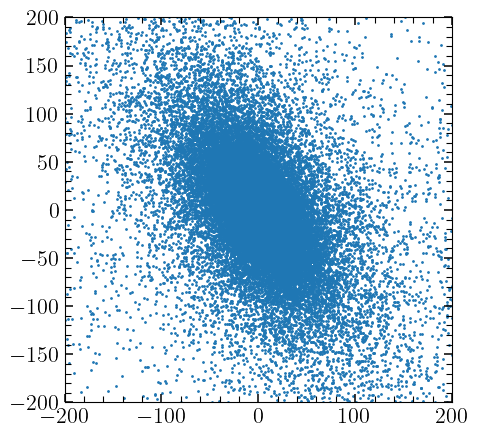

In [50]:
fig, ax = plt.subplots(1, 1,figsize=(5,5))
plt.scatter(SphericalH[:,0], SphericalH[:,1], s=1) 
plt.xlim(-200, 200)
plt.ylim(-200, 200)

# Basis computation

The first step is to construct the basis. The following options are available:
    - Hernquist
    - NFW
    - Power law
    - Empirical 

To construct the basis we use the `basis_builder` function in EXPtools.

In [51]:
basis_props = {'lmax': 5, 'nmax': 10, 'rmin': -2, 'rmax' : 2, 'nbins': 500, 'log_space': True}

In [52]:
basis, coefs = EXPtools.basis_builder.makebasis(SphericalH, np.ones(1000000)/1000000, basis_model='Hernquist',
                                                basis_id='sphereSL', time=0.0, nbins=50, rmin=0.02, rmax=2,
                                                log_space=True,
                                                lmax=5, nmax=10, scale=1, modelname='SLGrid.empirical_hern_halo', 
                                                cachename=".slgrid_sph_hern_empirical", 
                                                add_coef=False, coef_file='hern_empirical_coef.h5')

No config file provided.
Computing empirical density
---- SLGridSph::ReadH5Cache: successfully read basis cache <.slgrid_sph_hern_empirical>
SphericalSL::orthoTest: worst=0.0727848
------------------------------------------------------------
Cache parameters for SLGridSph: .slgrid_sph_hern_empirical
------------------------------------------------------------
model               : SLGrid.empirical_hern_halo
lmax                : 5
nmax                : 10
numr                : 51
cmap                : 1
rmin                : 0.02
rmax                : 1.9799999999999998
rmapping            : 1
diverge             : 0
dfac                : 1
------------------------------------------------------------


HDF5-DIAG: Error detected in HDF5 (1.10.7) thread 1:
  #000: ../../../src/H5A.c line 285 in H5Acreate2(): unable to create attribute
    major: Attribute
    minor: Unable to initialize object
  #001: ../../../src/H5Aint.c line 165 in H5A__create(): attribute already exists
    major: Attribute
    minor: Object already exists
Unable to create the attribute "geometry": (Attribute) Object already exists


In [53]:
read_model = np.loadtxt('SLGrid.empirical_hern_halo', skiprows=3)

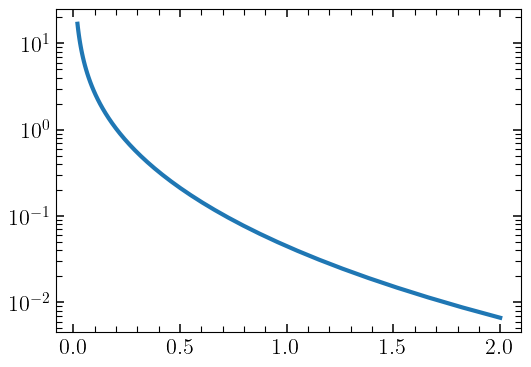

In [54]:
plt.semilogy(read_model[:,0], read_model[:,1])

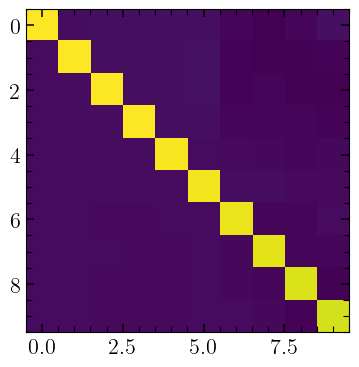

In [55]:
# Check that the basis is orthogonal
plt.imshow(basis.orthoCheck()[0])

In [56]:
rvals = np.linspace(basis_props['rmin'], basis_props['rmax'], basis_props['nbins'])

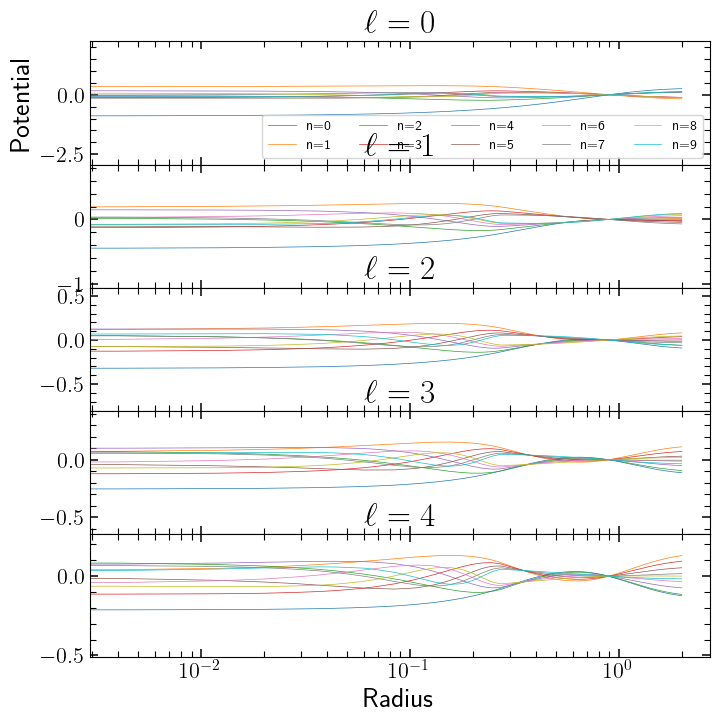

In [57]:
EXPtools.visuals.make_basis_plot(basis, rvals, basis_props);

## Coefficiens

### TODO visualize coefficients! 

In [58]:
Hern_coefs = coefs.getAllCoefs()

In [59]:
EXPtools.utils.indexing.I(3,0)

6

In [60]:
Hern_coefs[0,0][0]

(1.8230263235531774+0j)

In [61]:
lmax = basis_props['lmax']
index_lm = np.zeros((lmax+1, lmax+1))
for l in range(lmax+1):
    for m in range(l+1):
        k_index = EXPtools.utils.indexing.I(l, m)
        print(k_index)
        index_lm[l][m] = Hern_coefs[k_index,0][0]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


/tmp/ipykernel_134036/4001377793.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  index_lm[l][m] = Hern_coefs[k_index,0][0]


In [62]:
index_lm

array([[ 1.82302632e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.53229964e-04, -2.46146660e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.06350091e-01,  6.31221673e-04, -9.14131256e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.12522912e-04, -3.47491142e-04, -4.20991525e-05,
        -3.22788444e-05,  0.00000000e+00,  0.00000000e+00],
       [ 1.59192274e-02,  2.58659374e-05, -1.21237518e-02,
        -9.21107850e-05, -1.63229339e-02,  0.00000000e+00],
       [ 2.05843633e-04,  4.21533130e-05, -1.81239783e-04,
        -6.69645852e-04,  2.12290901e-04,  6.86456379e-04]])

In [69]:
coefs.Power()

array([[3.33420199e+00, 1.25020529e-05, 4.69563077e-02, 5.42483343e-06,
        2.06231996e-03, 6.78572775e-06]])

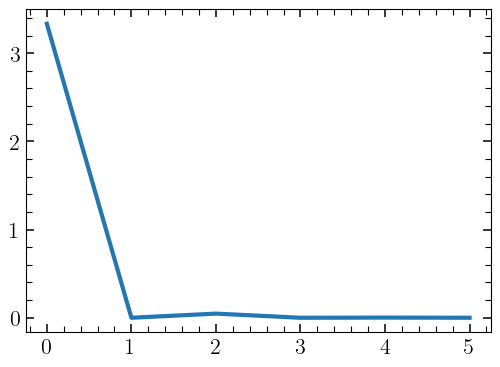

In [70]:
plt.plot(np.arange(0, lmax+1, 1), coefs.Power()[0])

In [73]:
coefs.Power()[0][1]/coefs.Power()[0][0]

3.74963872778482e-06

## Visualize fields

In [ ]:
coefs.

In [72]:
bfe_hern, r = EXPtools.visuals.spherical_avg_prop(basis, coefs, property='dens')

AttributeError: 'pyEXP.coefs.SphCoefs' object has no attribute 'set_coefs'

In [ ]:
 coefs.WriteH5Coefs()

In [ ]:
6%5

In [ ]:
5//5